In [1]:
!pip install spacy

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
%matplotlib inline

In [3]:
buisness = pd.read_csv('../input/yelp-csv/yelp_academic_dataset_business.csv')
review = pd.read_csv('../input/yelp-csv/yelp_academic_dataset_review.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,5,8,15,18,21,27,30,43,49,52,62,64,66,70,84,89,92,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
buisness_n = buisness[buisness['categories'].str.contains('Restaurant') == True]

In [5]:
buisness_n = buisness_n.fillna(0)

In [6]:
review_n = review[review.business_id.isin(buisness_n['business_id']) == True]

In [7]:
review_new = review_n.sample(n = 35000, random_state = 42)

In [8]:
text = review_new['text']

In [9]:
texts_n = []
for i in text:
    i = i.replace("\n", " ")
    texts_n.append(i)

In [10]:
texts_n[0]

"I mean who doesn't love walking into Fred's and eating lunch in the middle of Barneys...I've been twice and honestly had a great experience! amazing service and delicious food. Once for brunch - I had the prix fix brunch that includes a salad, brunch entree, drink, dessert AND coffee... for 24 bucks! not a bad deal....  second time I came was a little different - I strolled in with a friend and we had a boozy weekday lunch - he had the burger and I had the chicken salad...he ordered a manhattan which he exclaimed was the best one he's ever had and I had a delicious pinot grigio (micah I MISSSSS you!!) but the wait staff was the best! we made friends with them and chatted them up for almost two hours... they kept coming over and gave us cute places to go too... they were really sweet!!!   Too bad its INSANELY overpriced like the Proenza Schoulers!!"

In [11]:
from nltk.tokenize import word_tokenize
token_texts = []
for i in range (len(texts_n)):
    r = word_tokenize(texts_n[i])
    token_texts.append(r)

In [12]:
from string import punctuation
texts_new = [" ".join([word for word in text if word not in punctuation and not word.isnumeric() \
                      and len(word) > 1]) for text in token_texts]
texts_new[1]

"we went here last night with group of friends and got beers at the bar while waiting for table the beer selection is n't the greatest but it 's pretty solid we enjoyed some potosi cave ale and were seated in about minutes not too bad for group of on saturday night especially considering there was huge line of people waiting had the bad breath burger which truly lived up to its name the beef was quality and all the toppings on it were garlicky cheesy awesome goodness the bf had the reuben and said it was pretty tasty too think it 's safe to say we 'll be coming back"

In [13]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem_texts = []
token_texts2 = []
for i in range (len(texts_new)):
    r = word_tokenize(texts_new[i])
    token_texts2.append(r)
for text in token_texts2:
    l = ' '.join([lem.lemmatize(w) for w in text])
    lem_texts.append(l)
lem_texts[0]

"mean who doe n't love walking into Fred 's and eating lunch in the middle of Barneys ... 've been twice and honestly had great experience amazing service and delicious food Once for brunch had the prix fix brunch that includes salad brunch entree drink dessert AND coffee ... for buck not bad deal ... second time came wa little different strolled in with friend and we had boozy weekday lunch he had the burger and had the chicken salad ... he ordered manhattan which he exclaimed wa the best one he 's ever had and had delicious pinot grigio micah MISSSSS you but the wait staff wa the best we made friend with them and chatted them up for almost two hour ... they kept coming over and gave u cute place to go too ... they were really sweet Too bad it INSANELY overpriced like the Proenza Schoulers"

In [14]:
review_new = review_new.drop(['text'], axis=1)

In [15]:
review_new['text'] = lem_texts

In [16]:
review = review_new[['text','stars']]

In [17]:
review.head()

,text,stars
744909,mean who doe n't love walking into Fred 's and...,4
271907,we went here last night with group of friend a...,4
511006,This place did not leave me singing it 's prai...,3
342464,Allow me to say `` Yum '' with capital Yummy a...,5
596393,What can say the food is wonderful wa bit take...,4


In [18]:
revieww = review.sample(n=8000, random_state=42)

In [19]:
X = revieww['text']
y = revieww.drop(['text'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [21]:
X_train.shape

(5600,)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
cnt = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8, norm="l1", sublinear_tf=1)
cntv = cnt.fit_transform(X_train)

In [24]:
cntvv = cntv.toarray()

In [25]:
y_train = y_train.stars.tolist()

In [26]:
y_test = y_test.stars.tolist()

In [27]:
X_test_feat = cnt.transform(X_test)

In [28]:
X_test_feat = X_test_feat.toarray()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=7, C=80, penalty='l2', class_weight="balanced", solver="lbfgs", multi_class="multinomial")
clf.fit(cntv, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=80, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [31]:
pred1 = clf.predict(X_test_feat)

In [32]:
accuracy_score(pred1, y_test)

0.5345833333333333

In [34]:
cm = confusion_matrix(y_test, pred1)

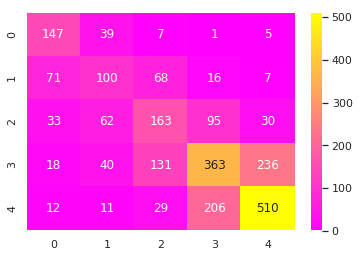

In [35]:
sns.set()
sns.heatmap(cm, annot=True, fmt="d", cmap="spring");

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
#params = {'n_estimators':(100,200,300),
          #'min_samples_leaf':(2,3,4,5),
          #'max_features':('auto','log2'),
          #'random_state':(5,6,7,42)}
#clf = RandomForestClassifier
#model = GridSearchCV(clf,params, cv=3)
#model.fit(cntvv,y_train)

In [38]:
clf1 = RandomForestClassifier(random_state=9, max_depth=20, n_estimators=70)

In [39]:
clf1.fit(cntvv,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [40]:
pred = clf1.predict(X_test_feat)

In [41]:
accuracy_score(pred,y_test)

0.41125

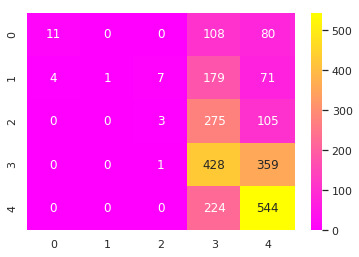

In [42]:
cm = confusion_matrix(y_test, pred)
sns.set()
sns.heatmap(cm, annot=True, fmt="d", cmap="spring");

In [47]:
def best_coefs(cnt,clf,coef,n):
    feat2coef = {word: coef for word, coef in zip(cnt.get_feature_names(), clf.coef_[coef])}
    for i in sorted(feat2coef.items(), key=lambda x: x[1], reverse=True)[:n]:
        print(i[0])

In [48]:
best_coefs(cnt,clf,0,12)

horrible
bad
no
worst
terrible
minute
asked
not
awful
money
disgusting
never


In [49]:
best_coefs(cnt,clf,1,12)

better
mediocre
two star
average
not
dry
wa not
nothing special
came
okay
disappointing
wa just
